In [336]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
import seaborn as sns

In [337]:
NNH = KNeighborsClassifier(n_neighbors= 5 )

In [338]:
bc_df = pd.read_csv("WDBC.csv")
bc_df.shape

(569, 32)

In [339]:
bc_df['Diagnosis'] = bc_df.Diagnosis.astype('category')

In [340]:
print(bc_df.describe())

                 ID  Mean radius  Mean texture  Mean perimeter    Mean area  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       Mean smoothness  Mean compactness  Mean concavity  Mean concavepoints  \
count       569.000000        569.000000      569.000000          569.000000   
mean          0.096360          0.104341        0.088799            0.048919   
std           0.014064          0.052813        

In [341]:
bc_df = bc_df.drop(labels = "Worst concave points", axis = 1)
bc_df= bc_df.drop(labels = "Worst symmetry", axis = 1)
bc_df = bc_df.drop(labels = "Worst fractal dimension", axis = 1)
bc_df = bc_df.drop(labels = "Worst smoothness", axis = 1)
bc_df = bc_df.drop(labels = "Worst compactness", axis = 1)
bc_df = bc_df.drop(labels = "Worst concavity", axis = 1)
bc_df = bc_df.drop(labels = "Mean symmetry", axis = 1)
bc_df = bc_df.drop(labels = "Mean fractal dimension", axis = 1)
bc_df = bc_df.drop(labels = "Mean smoothness", axis = 1)
bc_df = bc_df.drop(labels = "Mean compactness", axis = 1)
bc_df = bc_df.drop(labels = "Mean concavity", axis = 1)
bc_df = bc_df.drop(labels = "Mean concavepoints", axis = 1)
bc_df = bc_df.drop(labels = "radius SE", axis = 1)
bc_df = bc_df.drop(labels = "smoothness  SE", axis = 1)
bc_df = bc_df.drop(labels = "compactness SE", axis = 1)
bc_df = bc_df.drop(labels = "concavity SE", axis = 1)
bc_df = bc_df.drop(labels = "concavepoints SE", axis = 1)
bc_df = bc_df.drop(labels = "symmetry SE", axis = 1)
bc_df = bc_df.drop(labels = "fractaldimension SE", axis = 1)

In [342]:

bc_feature_df = bc_df.drop(labels= "Diagnosis" , axis = 1)
bc_feature_df.head()

,ID,Mean radius,Mean texture,Mean perimeter,Mean area,texture SE,perimeter SE,area SE,Worst radius,Worst texture,Worst perimeter,Worst area
0,842302,17.99,10.38,122.80,1001.0,0.9053,8.589,153.40,25.38,17.33,184.60,2019.0
1,842517,20.57,17.77,132.90,1326.0,0.7339,3.398,74.08,24.99,23.41,158.80,1956.0
2,84300903,19.69,21.25,130.00,1203.0,0.7869,4.585,94.03,23.57,25.53,152.50,1709.0
3,84348301,11.42,20.38,77.58,386.1,1.1560,3.445,27.23,14.91,26.50,98.87,567.7
4,84358402,20.29,14.34,135.10,1297.0,0.7813,5.438,94.44,22.54,16.67,152.20,1575.0


In [343]:

bc_labels = bc_df["Diagnosis"]
bc_labels

0      M
1      M
2      M
3      M
4      M
5      M
6      M
7      M
8      M
9      M
10     M
11     M
12     M
13     M
14     M
15     M
16     M
17     M
18     M
19     B
20     B
21     B
22     M
23     M
24     M
25     M
26     M
27     M
28     M
29     M
      ..
539    B
540    B
541    B
542    B
543    B
544    B
545    B
546    B
547    B
548    B
549    B
550    B
551    B
552    B
553    B
554    B
555    B
556    B
557    B
558    B
559    B
560    B
561    B
562    M
563    M
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: category
Categories (2, object): [B, M]

In [344]:
# The first column is id column which is patient id and nothing to do with the model attriibutes. So drop it.

bc_feature_df = bc_feature_df.drop(labels = "ID", axis = 1)


In [345]:

bc_labels.dtypes

CategoricalDtype(categories=['B', 'M'], ordered=False)

In [346]:
cleanup_nums = {"M": 1, "B": 0}
bc_labels.replace(cleanup_nums, inplace=True)
bc_labels.head(30)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
20    0
21    0
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
Name: Diagnosis, dtype: int64

In [348]:
# convert the features into z scores as we do not know what units / scales were used and store them in new dataframe
# It is always adviced to scale numeric attributes in models that calculate distances.

bc_feature_df_z = bc_feature_df.apply(zscore)  # convert all attributes to Z scale 

bc_feature_df_z.describe()

,Mean radius,Mean texture,Mean perimeter,Mean area,texture SE,perimeter SE,area SE,Worst radius,Worst texture,Worst perimeter,Worst area
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-1.256562e-16,1.049736e-16,-1.272171e-16,-1.900452e-16,-9.912009e-17,-2.968237e-16,-1.088760e-16,-7.988142e-16,-1.834112e-17,-4.015534e-16,-2.848727e-17
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-1.554264e+00,-1.044049e+00,-7.378291e-01,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-6.948092e-01,-6.237679e-01,-4.947542e-01,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-1.974976e-01,-2.866520e-01,-3.477828e-01,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,4.665523e-01,2.430307e-01,1.067726e-01,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,6.655279e+00,9.461986e+00,1.104184e+01,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00


In [349]:
# store the normalized features data into np array 

X = np.array(bc_feature_df_z)
X.shape

(569, 11)

In [350]:
# store the bc_labels data into a separate np array

y = np.array(bc_labels)
y.shape

(569,)

In [351]:
# Split X and y into training and test set in 75:25 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [352]:
# Call Nearest Neighbour algorithm

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [353]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

y_predict = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.935672514619883

In [354]:
predicted_labels = NNH.predict(X_test)

In [355]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(metrics.confusion_matrix(y_test, predicted_labels))

[[104   4]
 [  7  56]]


In [356]:
# To improve performance ------------------------- Iteration 2 -----------------------------------


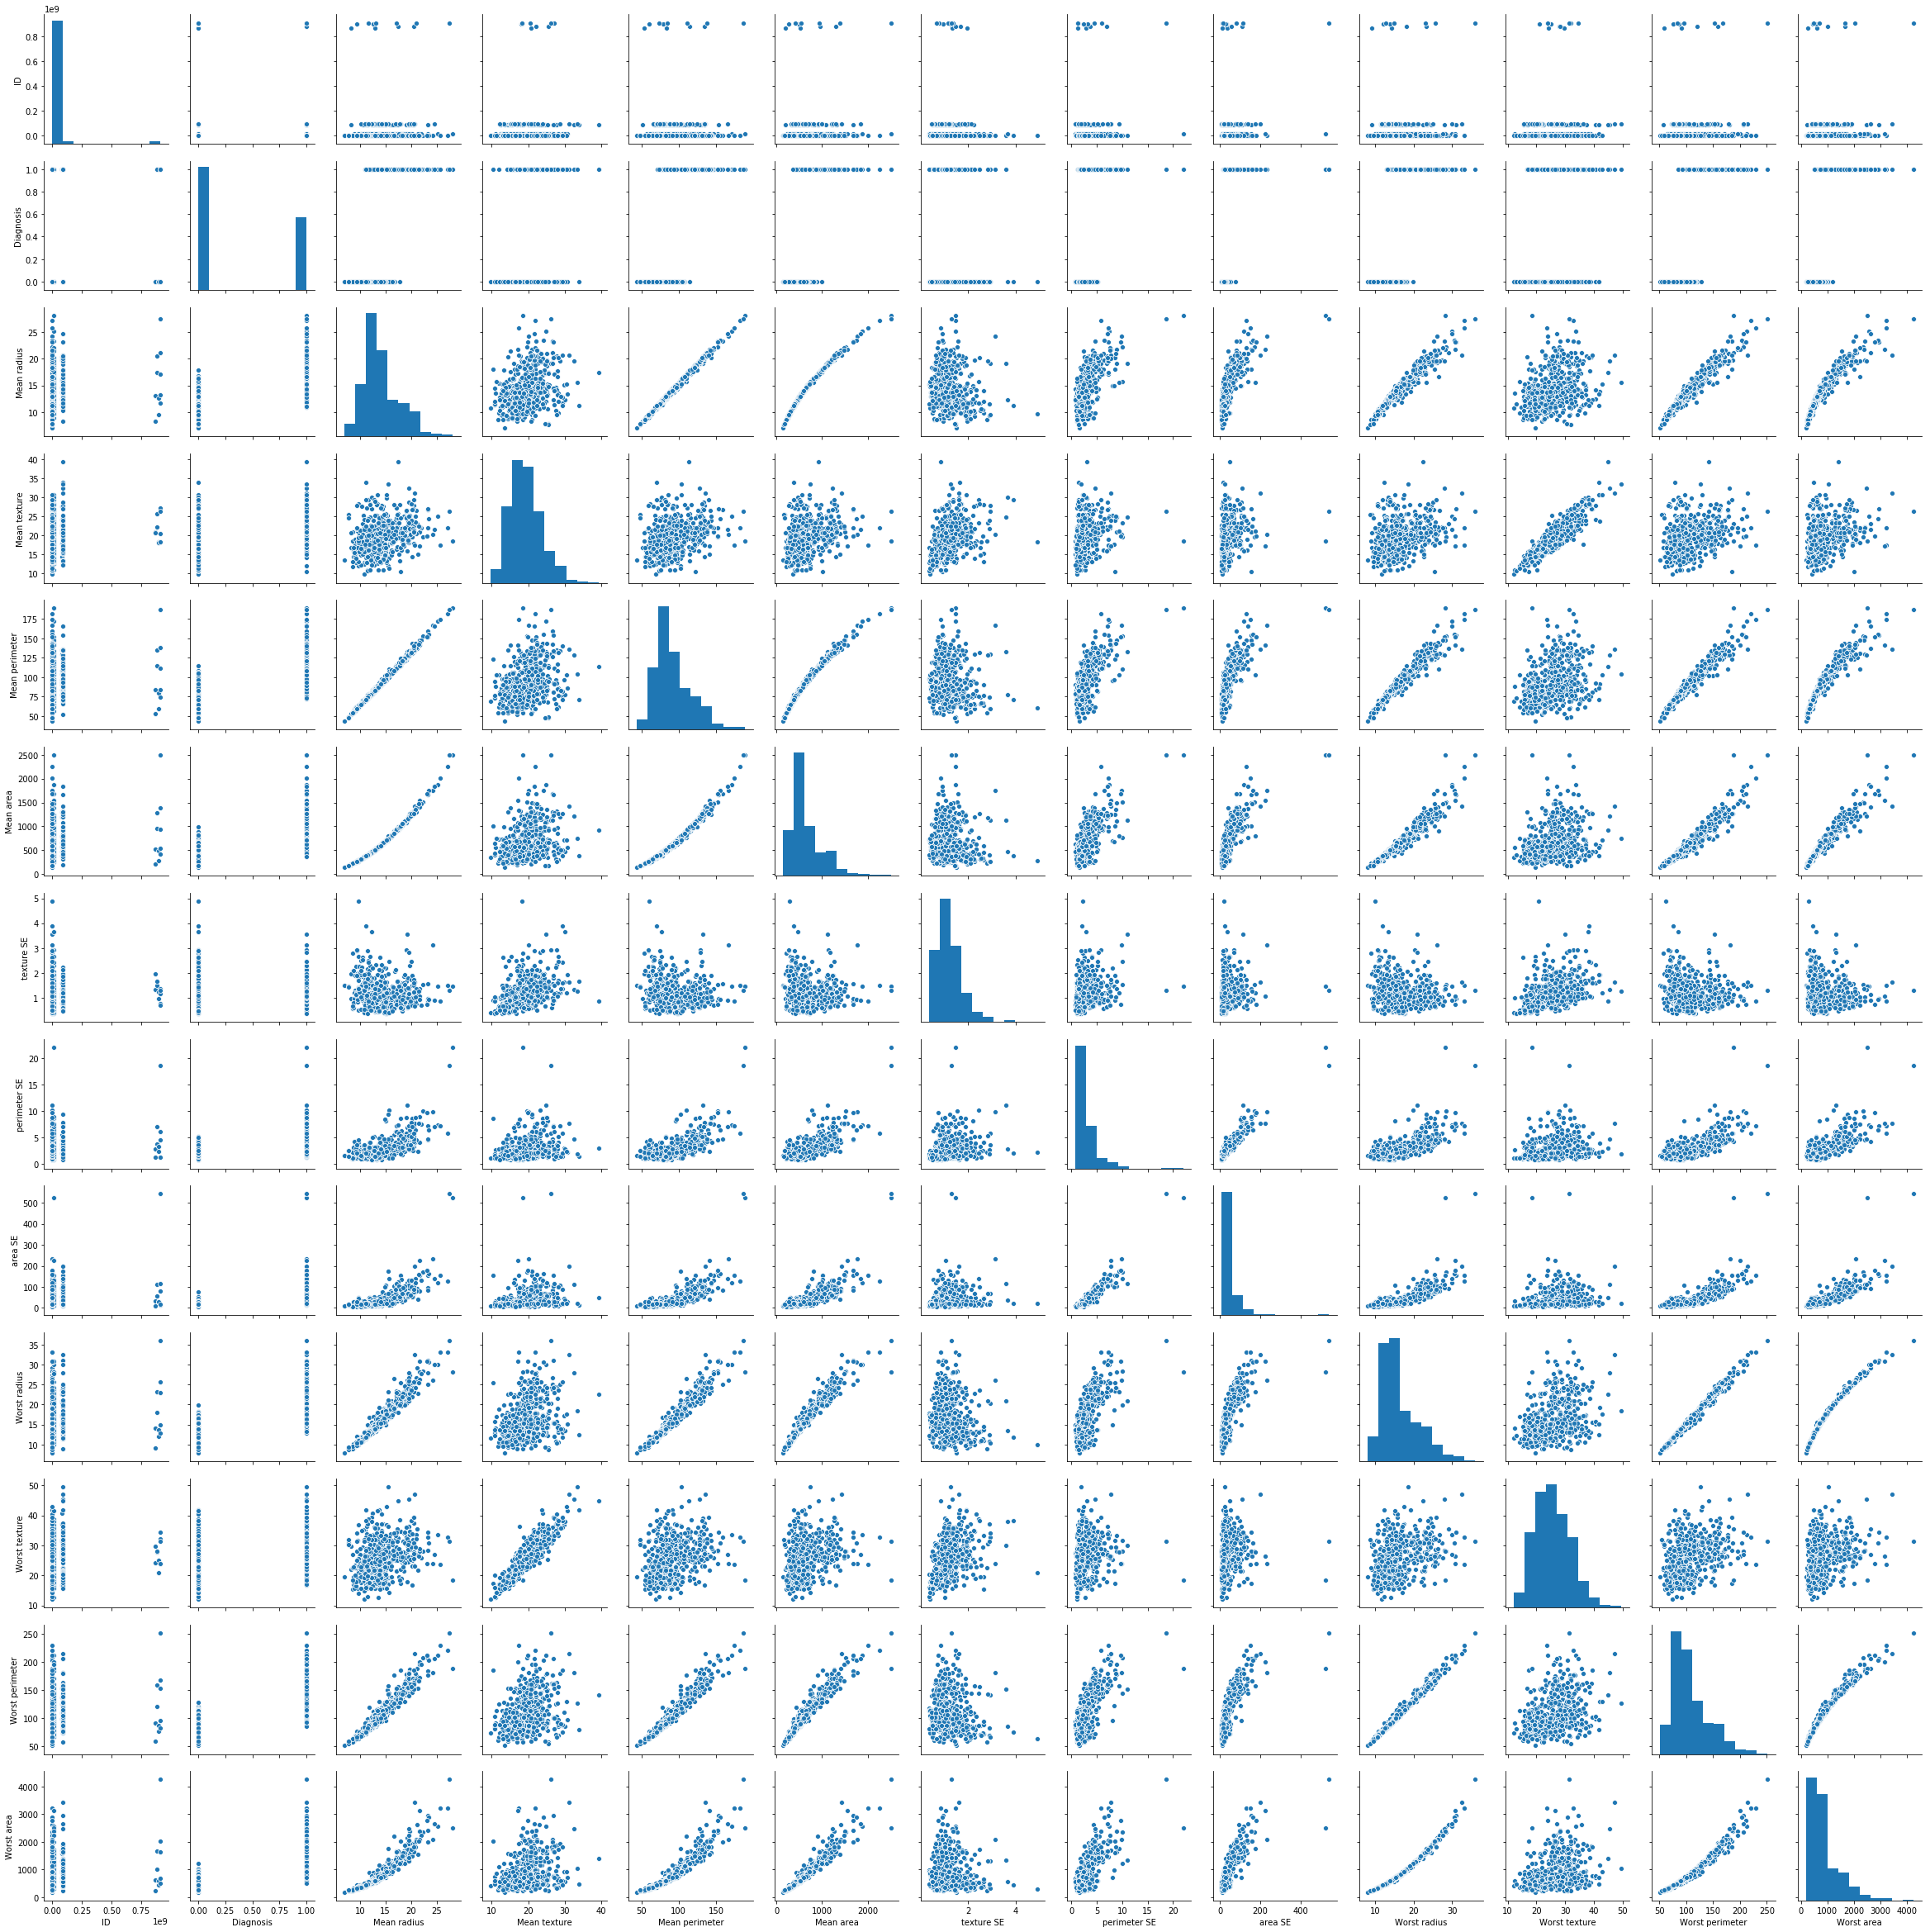

In [357]:
# Let us analyze the different attributes for distribution and the correlation by using scatter matrix

sns.pairplot(bc_df)

In [358]:
# As is evident from the scatter matrix, many dimensions have strong correlation and that is not surprising
# Area and Perimeter are function of radius, so they will have strong correlation. Why take multiple dimensions 
# when they convey the same information to the model?

In [360]:
# To to drop dependent columns from bc_df

bc_features_pruned_df_z =  bc_feature_df_z.drop(['Mean radius'], axis=1)

In [361]:
X = np.array(bc_features_pruned_df_z)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [362]:
# Call Nearest Neighbour algorithm
NNH = KNeighborsClassifier(n_neighbors= 20 , weights = 'distance' )

NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='distance')

In [363]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point

predicted_labels = NNH.predict(X_test)

In [364]:
# get the accuracy score which is how many test cases were correctly predicted as a ratio of total number of test cases

NNH.score(X_test, y_test)

0.9181286549707602

In [367]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics

print(pd.DataFrame(metrics.confusion_matrix(y_test, predicted_labels, labels=[1 , 0]), index=['true:yes', 'true:no'], columns=['pred:yes', 'pred:no']))


          pred:yes  pred:no
true:yes        54        9
true:no          5      103


In [368]:
# peformance has dropped! So, be careful about the dimensions you drop. 
#Domain expertise is a must to know whether dropping radius or dropping area
#will be better. The area may be a stronger predictor than radius and the
#way they are calculated under a electron microscope may be effecting the outcome

In [369]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,50))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % best_k)

The optimal number of neighbors is 7


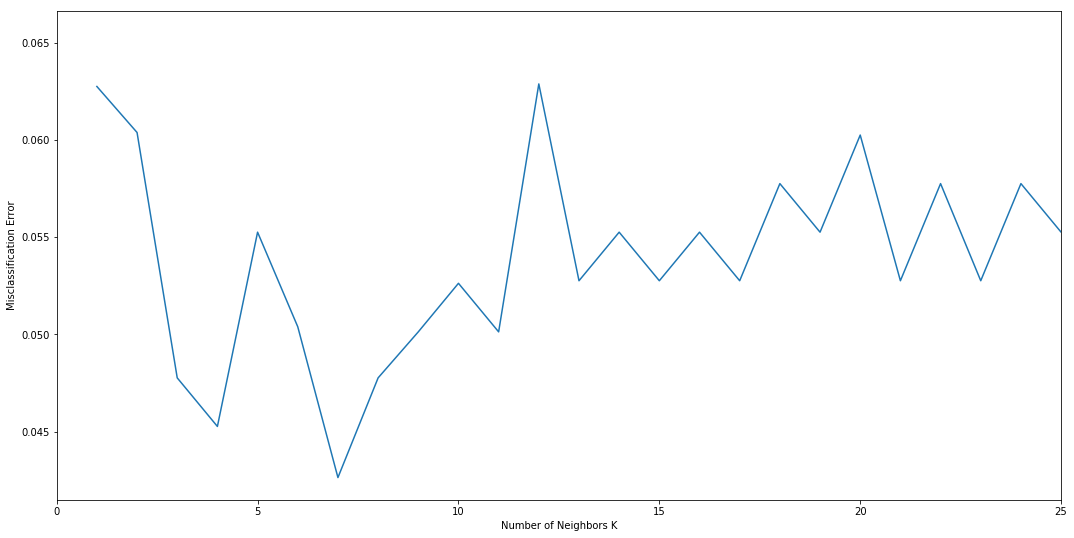

In [370]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 18
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, MSE)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()
